In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## VS Code, choisir un seul des 3 :

# Pour affichage interactif (notamment 3D) dans notebook
# %matplotlib widget

# Pour affichage interactif (notamment 3D) hors du notebook
# %matplotlib qt

# Pour affichage simple dans notebook
%config InlineBackend.figure_format = 'png'

In [2]:
df = pd.read_csv('data/df_train.csv')
df

,Unnamed: 0,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,...,nbdisplayglobalapprox_1d_sum_xdevice,hashed_uid,hashed_xd_id,valueperclick,device_type,display_width,display_height,display_timestamp,is_display_clicked,zonecostineuro
0,0,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,"b""f|g\xd5T\xc8\xe2\x90\xc6\xc8\xfeL\x0c\x15\xe...",6,web,1,74.0,0.0,127.0,...,23.000000,b'\x99w[\xb8\xe1\x9e\xbaz\x01\x06\x9c\xdc\x03\...,b'\xdb\xfc\xdfBY`$\x97\xf9\xaaGn\x98\xe0{RQ\x9...,0.529218,Android,0,0,1603150590,0,0.366238
1,1,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,0,web,1,74.0,0.0,127.0,...,98.252222,b'>\x1a\x00W\xb0\x81\x06\x00\x90\xc8\x8aL\xb4\...,b'\xe9\xcd\x80\xb5\x96\xcf8\x8eo(p-\x0f\xf4\xf...,0.269752,Desktop,0,0,1603150640,0,0.025551
2,2,2020-10-19,"b'\xa1l\n\xb2`\xe3\x0b""\xcd\x06\xfa\xdf\x9aj0\...","b'\xbe\xa0?\xc2</,\xa4&w\x86\xe9\x150Y\xd4\xdf...",6,web,1,4.0,2.0,10.0,...,11.000000,b'o\xa5~{\xf5\xd0C\xac_\xa9\x10\x95\x04L\x8a\x...,b'o\xa5~{\xf5\xd0C\xac_\xa9\x10\x95\x04L\x8a\x...,0.095993,Android,640,150,1603150780,0,0.289000
3,3,2020-10-19,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,6,web,1,73.0,1.0,127.0,...,57.000000,b'\xf2\x93e\xae\xadBh\x9f<<\x9e\xf0\x91q\xba\x...,"b'\x83u\xce\x10n\x9f\x10hP\x0cI\xdb \xed\xa8,E...",0.269752,iPhone,2,2,1603150840,0,0.243945
4,4,2020-10-19,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'\xa0\t^\xa5Z\x06[-\x86\x13\xd8\x08\x98\x8de\...,8,app_ios,2,74.0,0.0,127.0,...,2.000000,b'\xe6\xa9\xb2:\xc5\x04\xfd\x89/Lg\xc1\x0e\xa4...,b'\xe6\xa9\xb2:\xc5\x04\xfd\x89/Lg\xc1\x0e\xa4...,0.136416,iPhone,0,0,1603149970,0,0.647304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855309,1856868,2020-10-13,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'\xef5\x9d\xc0y\x18\xa1\x8c\xa5l\xb5\r\x92-\x...,0,app_android,1,4.0,1.0,12.0,...,14.000000,b'\xd3\x12\xaat\xfb\x1c\xde\xe9\xa7qs\x00\x17\...,"b'p\xee,\xe4\xb8\x1c\x81\xe1\xac\xe3\xb5\xe0L\...",0.086955,Android,800,1280,1602617290,1,0.558000
1855310,1856869,2020-10-13,b'\xa3w\x0e\x92#\xa6\xa8\x1b\xe2\xbeS\x85C\x10...,b'\x9aMGt\x00\x1a\xf4\xee\x0fS\xe5\x03\xd0\x88...,9,web,1,83.0,1.0,127.0,...,1.000000,b'\xee\xd7_<\xa3\xa8\x01\x1e\xaa\xa09\x88\xe8\...,b'\n\xd5D\x88\x9eA\xf3c\x8dg\xecJ\xad|f\x99\xa...,0.203823,Desktop,970,250,1602615620,0,0.150153
1855311,1856870,2020-10-13,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,"b""f|g\xd5T\xc8\xe2\x90\xc6\xc8\xfeL\x0c\x15\xe...",8,app_android,1,4.0,1.0,12.0,...,10.159028,b'\xb8d\x99\xd4\x10\xf1M$&_\xcaV\x07\x9b\xedt>...,b'\xf6+\xfe\xafJ\xc5\x82\xcc\x99\x10\x8dg\x8f\...,0.500099,Android,320,480,1602615640,0,5.790000
1855312,1856871,2020-10-13,b'\x0f\xbc\x909\x14[dI\xa7v]\xcc\x00\xd3\xbd\x...,b'\xf4k\x93K{l\xcfK3n\xc2\xa2U.R1\x9a\xd3\xe6H...,9,web,2,4.0,2.0,16.0,...,21.645185,b'\xffqWf\xfbU\xb5\x10\xcd\xed\x89W\xe9\xcb\xa...,b'\x8b\xb9\xcf\x82\x9f\xe96@\xbf7\xed#\xfb\x10...,0.145812,Android,300,250,1602615660,0,0.020000


In [3]:
df.dtypes

Unnamed: 0                                          int64
day                                                object
hashed_partner_id                                  object
hashed_campaign_id                                 object
contextid                                           int64
display_env                                        object
target_env                                          int64
rtbtypeid                                         float64
rtbadvisibility                                   float64
rtb_detectedlanguage                              float64
urlhash2                                          float64
urlhash3                                          float64
urlhash4                                          float64
user_country                                       object
hashed_affiliateid                                 object
hashed_app_id                                      object
googleviewability                                 float64
googlepagevert

In [4]:
df.columns

Index(['Unnamed: 0', 'day', 'hashed_partner_id', 'hashed_campaign_id',
       'contextid', 'display_env', 'target_env', 'rtbtypeid',
       'rtbadvisibility', 'rtb_detectedlanguage', 'urlhash2', 'urlhash3',
       'urlhash4', 'user_country', 'hashed_affiliateid', 'hashed_app_id',
       'googleviewability', 'googlepagevertical', 'campaignscenario',
       'campaignvertical', 'campaignctrlast24h', 'is_interstitial',
       'dayssincelastvisitdouble', 'ltf_lastpartnerclicktimestamp',
       'ltf_nbglobalclick_4w', 'ltf_nbglobaldisplay_4w',
       'ltf_nbglobaldisplaysincelastpartnerproductview',
       'ltf_nbpartnerdisplayssincelastclick', 'ltf_nbpartnerclick_4w',
       'ltf_nbpartnerdisplay_4w', 'ltf_nbpartnersales_4w',
       'ltf_nbpartnerdisplay_90d', 'ltf_nbpartnerclick_90d',
       'ltf_nbpartnersales_90d', 'nbdayssincelastclick', 'nbdisplay_1hour',
       'nbdisplaypartnerapprox_1d_sum_xdevice',
       'nbdisplayaffiliateapprox_1d_sum_xdevice',
       'nbdisplayglobalapprox_1d_s

In [5]:
# # On trace la matrice des nuages de points afin de percevoir les premiers liens entre les variables potentiellement explicatives des clics.
# sns.set(font_scale=0.3)
# sns.pairplot(df[['googleviewability','campaignctrlast24h','dayssincelastvisitdouble', 'ltf_lastpartnerclicktimestamp','ltf_nbglobalclick_4w','ltf_nbglobaldisplay_4w','ltf_nbglobaldisplaysincelastpartnerproductview','ltf_nbpartnerdisplayssincelastclick', 'ltf_nbpartnerclick_4w','ltf_nbpartnerdisplay_4w', 'ltf_nbpartnersales_4w','ltf_nbpartnerdisplay_90d', 'ltf_nbpartnerclick_90d','ltf_nbpartnersales_90d', 'nbdayssincelastclick', 'nbdisplay_1hour','nbdisplaypartnerapprox_1d_sum_xdevice','nbdisplayaffiliateapprox_1d_sum_xdevice','nbdisplayglobalapprox_1d_sum_xdevice','valueperclick','display_width', 'display_height','zonecostineuro']], height=0.6, markers=".", aspect=1.1)
# plt.show()

# Corrélations

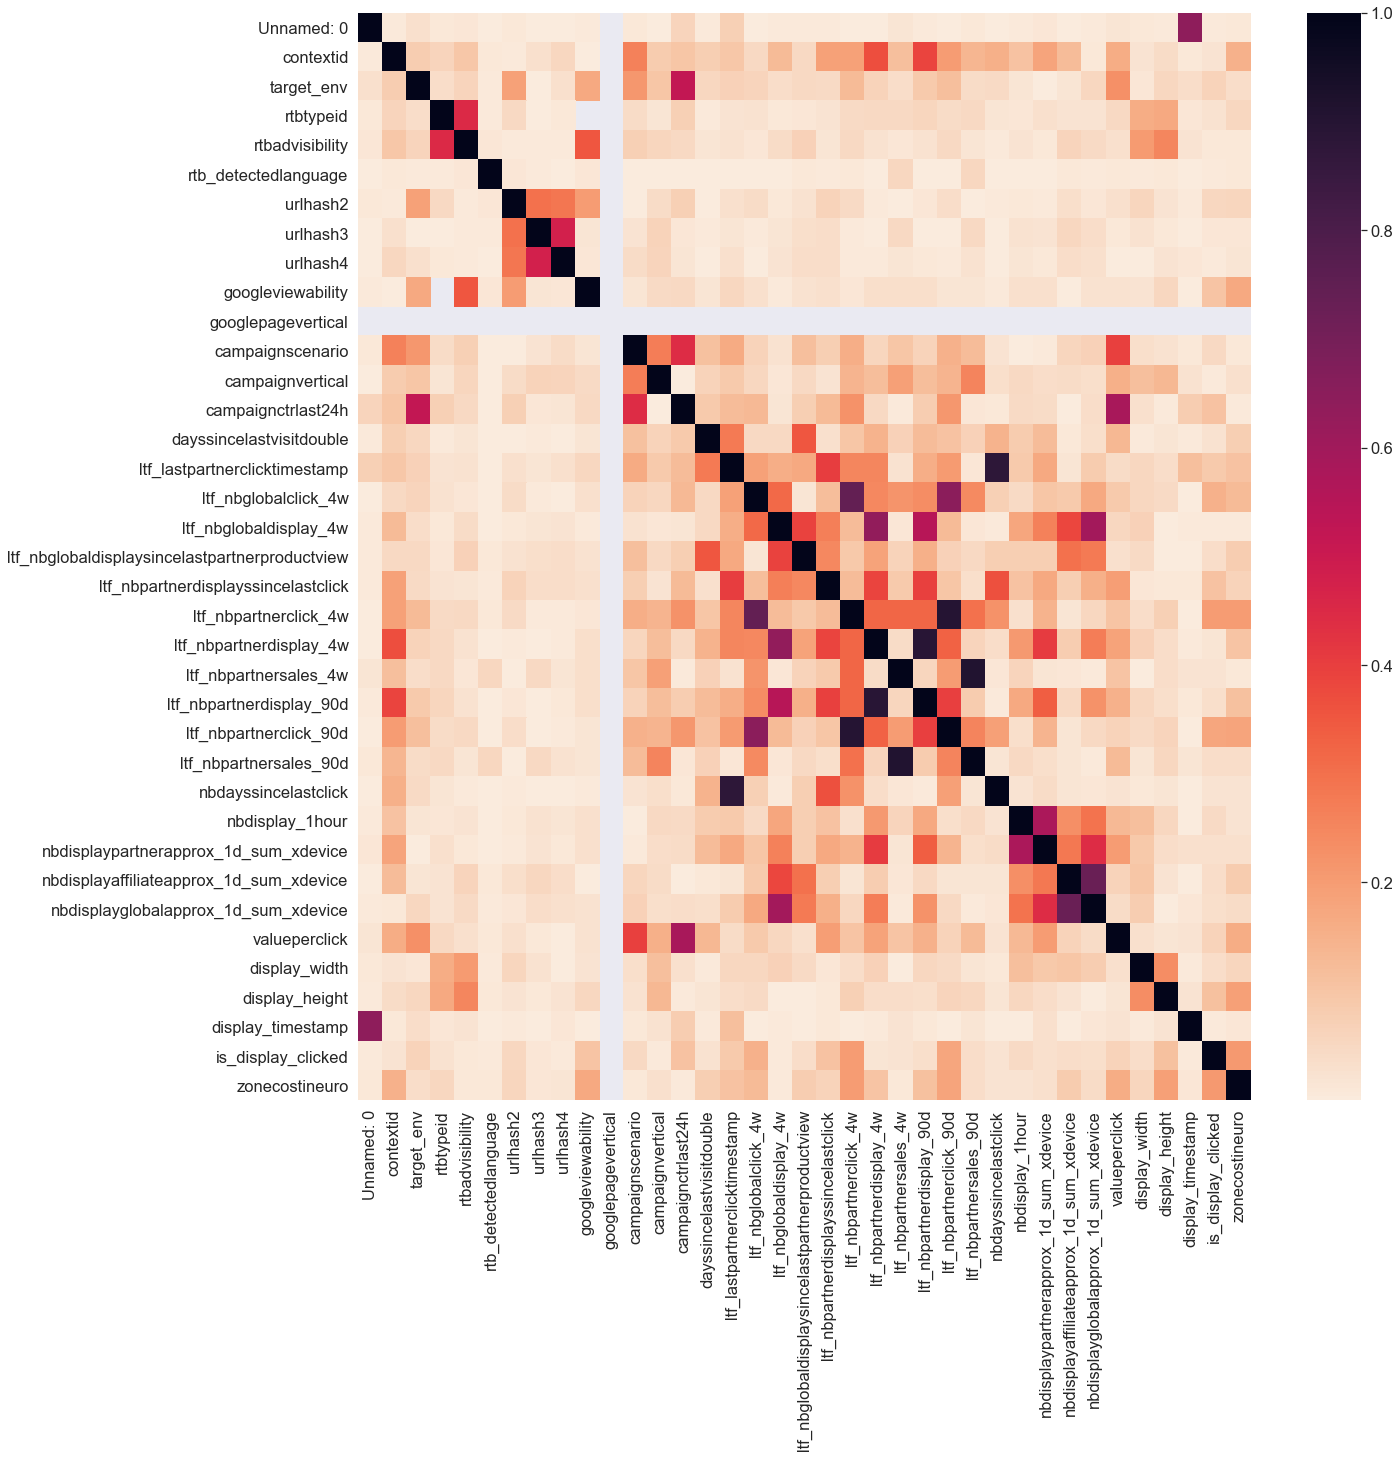

In [6]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = df.corr()
corrMatrix = np.abs(corrMatrix)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

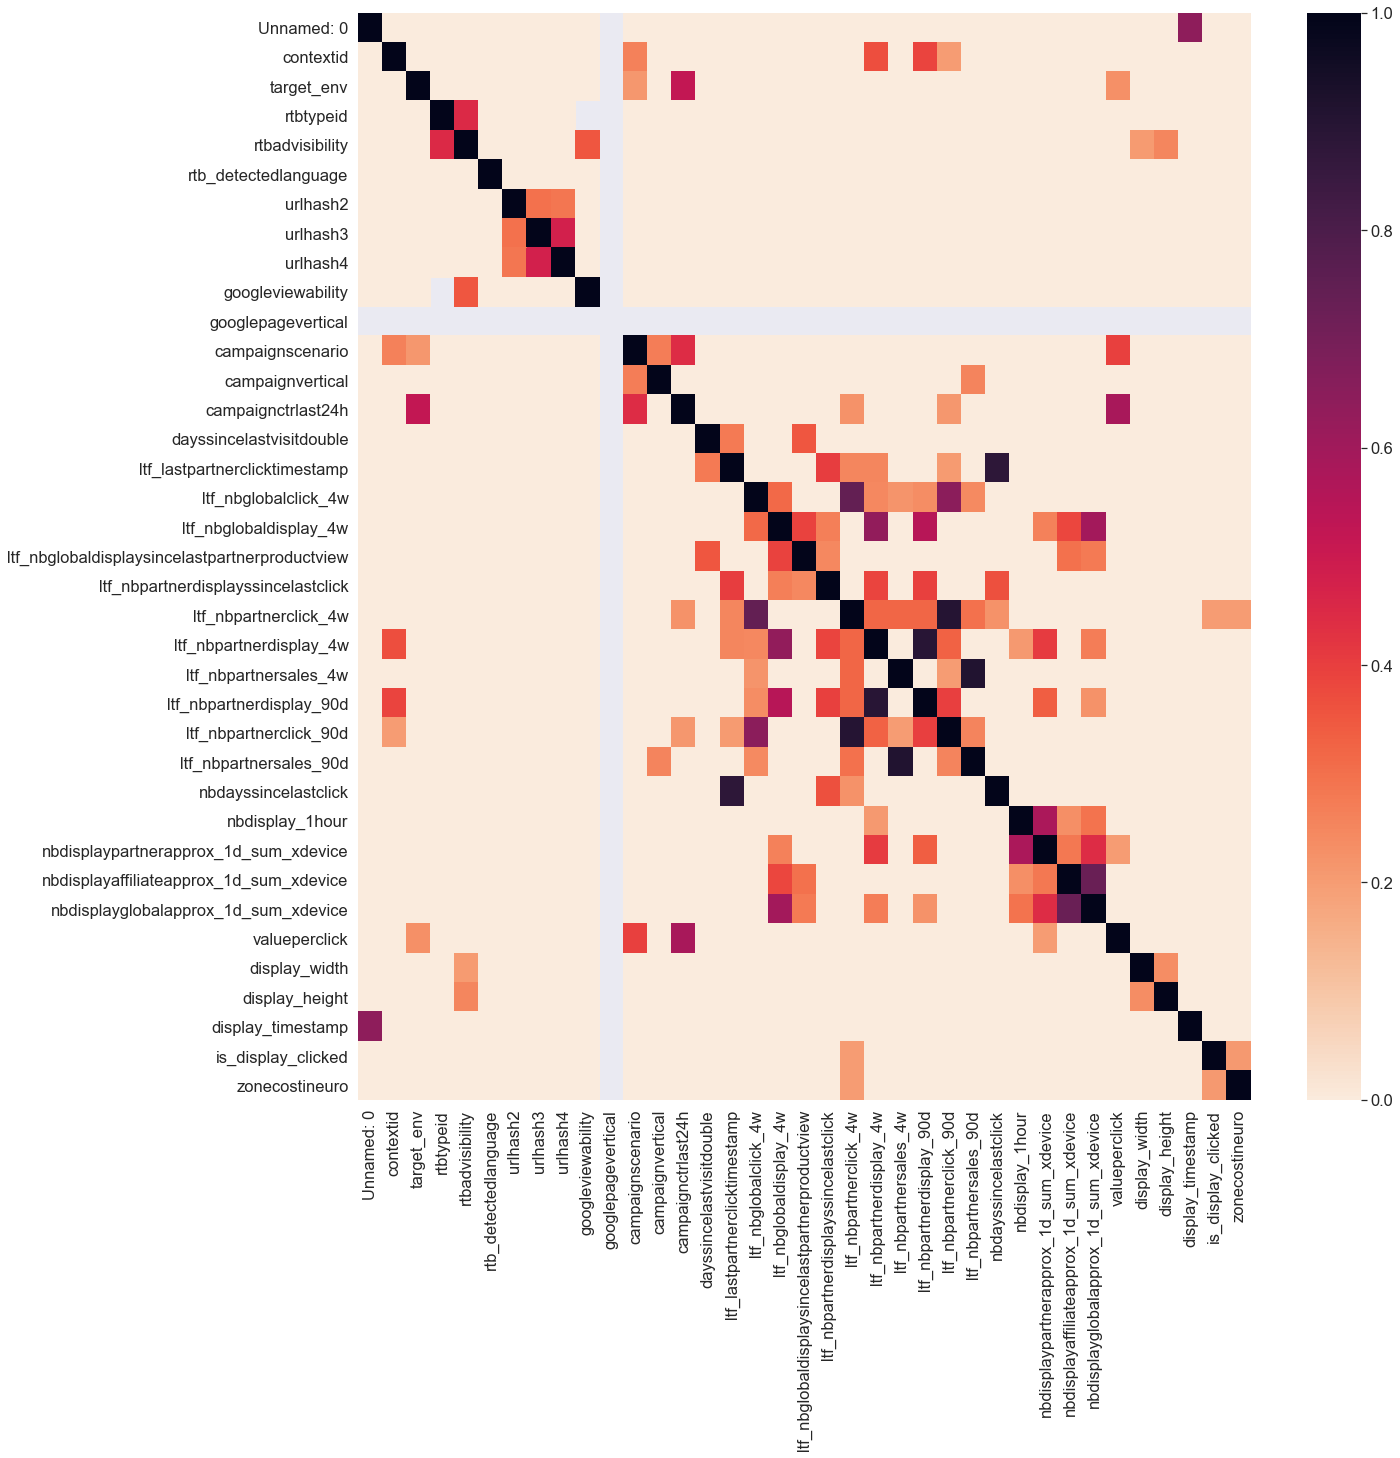

In [7]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = corrMatrix.applymap(lambda x : 0 if x <= 0.2 else x)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

# Histogrammes en fonction des clics

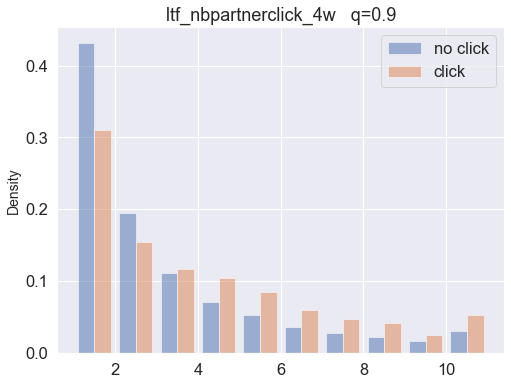

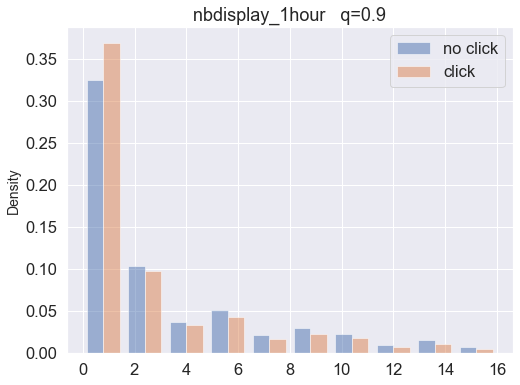

In [8]:
def f(column_title, quantile):
    column = df[column_title]
    column = column[column < column.quantile(q=quantile)]
    plt.figure(figsize=(8,6))
    data = [column[df.is_display_clicked==0], column[df.is_display_clicked==1]]
    plt.hist(data, density=True, alpha=0.5, label=("no click", 'click'))
    plt.ylabel("Density", size=14)
    plt.title(f'{column_title}   q={quantile}')
    plt.legend(loc='upper right')
    plt.show()
    
for a,b in [("ltf_nbpartnerclick_4w", 0.9), ("nbdisplay_1hour", 0.9)]:
    f(a,b)

# Répartition des clics selon les modalités d'une variable catégorielle

In [9]:
df["contextid"].value_counts()

6     629059
0     311874
7     229737
9     205667
8     168342
5     149310
4     106780
10     40998
2      13547
Name: contextid, dtype: int64

In [10]:
# Recodage de certaines modalités afin de réordonner par ordre croissant d'engagement
df["contextid"] = df["contextid"].replace(0,1)
df["contextid"] = df["contextid"].replace(10,3)

In [11]:
df["contextid"].value_counts() # Vérification de la modification

6    629059
1    311874
7    229737
9    205667
8    168342
5    149310
4    106780
3     40998
2     13547
Name: contextid, dtype: int64

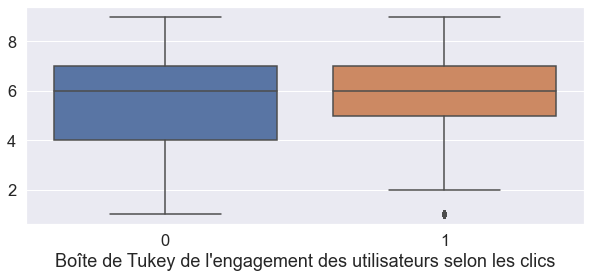

In [12]:
ax = plt.subplots(figsize=(10,4))
sns.set_style("whitegrid")
sns.boxplot(x="is_display_clicked", y="contextid", data=df, ax=ax[1])
ax[1].set_xlabel("Boîte de Tukey de l'engagement des utilisateurs selon les clics")
ax[1].set_ylabel('')
plt.show()

In [13]:
print(df["contextid"][df["is_display_clicked"] == 0].describe())
print(df["contextid"][df["is_display_clicked"] == 1].describe())

count    1.749090e+06
mean     5.490233e+00
std      2.465902e+00
min      1.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      7.000000e+00
max      9.000000e+00
Name: contextid, dtype: float64
count    106224.000000
mean          5.770570
std           2.410808
min           1.000000
25%           5.000000
50%           6.000000
75%           7.000000
max           9.000000
Name: contextid, dtype: float64


On observe un engagement moyen légèrement supérieur parmi les utilisateurs ayant cliqué. 

In [14]:
def stacked_barplot(column):

    # Data
    clicked = df[df['is_display_clicked'] == 1].groupby(column).count()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(column).count()['is_display_clicked']
    total = df.groupby('contextid').count()['is_display_clicked']
    clicked = clicked / total * 100
    notclicked = notclicked / total * 100

    r = list(range(len(clicked)))

    # plot
    barWidth = 0.85
    names = clicked.index
    # Create orange Bars
    plt.bar(r, list(notclicked), color='#f9bc86', edgecolor='white', width=barWidth, label="no click")
    # # Create blue Bars
    plt.bar(r, list(clicked), bottom=list(notclicked), color='#a3acff', edgecolor='white', width=barWidth, label='click')

    plt.legend()
    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel(column)
    plt.ylabel('Répartition des clics')

    # Show graphic
    plt.show()

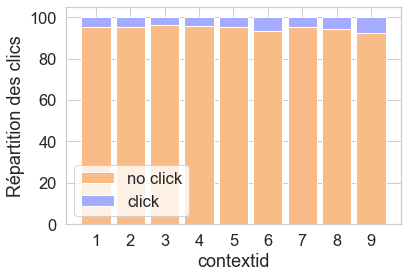

In [15]:
stacked_barplot('contextid')

# Bots

Calcul du nombre de clics par utilisateurs

In [16]:
a = df[['is_display_clicked', 'hashed_uid']].groupby(['hashed_uid']).sum()
a.sort_values('is_display_clicked', ascending=False)

,is_display_clicked
hashed_uid,
"b""@$\x11\xe2\xd7'\xba\xbdD\xd1\xea\xb6\x17v\x06\x9c\xc7/\xb4:.F\x95'\x11\xb2\xf6]\xec\xf1\xdd\xa1""",10
b'\x187\xb3\x93\x8cy\xd0MSG?\xd7\xd9\xbav?8$#(-*x\xd1\x1c\xed\x18\xa8\xd8y\x8b\xf1',10
b'#\x0b\xd7*\xa1\xae\x8fLT\xe1[W\x9f\xaf^-1\xfd~\x0f\x0ca\xf7+\x80?)_w\xdd\x9bR',9
b'\xdc)W\x0b|\xe4\xf1\xb9`\xf7\x8f\x11\x16\xf5\x8a\x81\xbcktZG\xb1\xff\xd2\xca\x1a\xaeA\x90z[W',9
b'\x13\x88\x8d\xd3h\xd9\xa1f\xd3\xea\x1e\x8d\xb7Dn\xa2\x0c>\xea\xf5n\xd3\xb1\xcbJ\x10\x06\x19\xde\x04J\xf9',9
...,...
"b'\x05\xaa"".\xdd\xa1\x03Aw\x12\xef\xcez\xf2L\x84\xd50\xf3\x9a\xed\xa6\\)\x1e\xe0\xed\xb1x\xd2\x85j'",0
"b'\x05\xa9v\xeam\x1a:\x0f\xea\xcdBQ\xf6,\x8f\x92\x92B{eN\x8dN""\x07\x13H\xce\x83\x90\xfc#'",0
b'\x05\xa9u\xe4\xdc\xb0hW}c\xf2\xfe2\x84\x077\xb6\xbb^uB\\\xc6}K\x91\xb1\xbbS;\xac\x04',0


In [17]:
# `hashed_uid` : Hashed identification number of the Web user
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']
d

,is_display_clicked,contextid,user_apperances,contextid_weighted
hashed_uid,,,,
"b""@$\x11\xe2\xd7'\xba\xbdD\xd1\xea\xb6\x17v\x06\x9c\xc7/\xb4:.F\x95'\x11\xb2\xf6]\xec\xf1\xdd\xa1""",10,90,10,9.000000
b'\x187\xb3\x93\x8cy\xd0MSG?\xd7\xd9\xbav?8$#(-*x\xd1\x1c\xed\x18\xa8\xd8y\x8b\xf1',10,65,11,5.909091
b'#\x0b\xd7*\xa1\xae\x8fLT\xe1[W\x9f\xaf^-1\xfd~\x0f\x0ca\xf7+\x80?)_w\xdd\x9bR',9,77,11,7.000000
b'\xdc)W\x0b|\xe4\xf1\xb9`\xf7\x8f\x11\x16\xf5\x8a\x81\xbcktZG\xb1\xff\xd2\xca\x1a\xaeA\x90z[W',9,89,12,7.416667
b'\x13\x88\x8d\xd3h\xd9\xa1f\xd3\xea\x1e\x8d\xb7Dn\xa2\x0c>\xea\xf5n\xd3\xb1\xcbJ\x10\x06\x19\xde\x04J\xf9',9,11,11,1.000000
...,...,...,...,...
"b'\x05\xaa"".\xdd\xa1\x03Aw\x12\xef\xcez\xf2L\x84\xd50\xf3\x9a\xed\xa6\\)\x1e\xe0\xed\xb1x\xd2\x85j'",0,6,1,6.000000
"b'\x05\xa9v\xeam\x1a:\x0f\xea\xcdBQ\xf6,\x8f\x92\x92B{eN\x8dN""\x07\x13H\xce\x83\x90\xfc#'",0,1,1,1.000000
b'\x05\xa9u\xe4\xdc\xb0hW}c\xf2\xfe2\x84\x077\xb6\xbb^uB\\\xc6}K\x91\xb1\xbbS;\xac\x04',0,5,1,5.000000


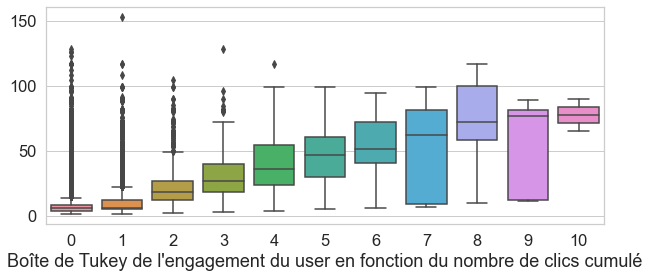

In [18]:
ax = plt.subplots(figsize=(10,4))
sns.set_style("whitegrid")
sns.boxplot(x="is_display_clicked", y="contextid", data=d, ax=ax[1])
ax[1].set_xlabel("Boîte de Tukey de l'engagement du user en fonction du nombre de clics cumulé")
ax[1].set_ylabel('')
plt.show()

In [19]:
# `hashed_xd_id` : Hashed cross device identification number 
b = df[['is_display_clicked', 'hashed_xd_id']].groupby(['hashed_xd_id']).sum()
b.sort_values('is_display_clicked', ascending=False)

,is_display_clicked
hashed_xd_id,
b'\x12\xb97|\xbe~\\\x94\xe8\xa7\r\x9d#\x92\x95#\xd1J\xfa\x95G\x93\x13\x0f\x8a9Y\xc7\xb8I\xac\xa8',14472
"b""L\xf5H\x97\x10\xfd\x7f~\x1a9\xa3?\xac\xfdNf\xf6\\\x8f13\xc1\xcc\xf8\xbf\xc9q\x87'\xbc]H""",10
b'\x97\x9d)\xb3*\x8e\xf6\xeer\xf7\x166a\x12\xcc\xa5\xf4\x90\xc9\xd9\x197\xd1\xdf\x17f\x10%\xfe\x99\xe4\xb1',10
"b""\xbaI`\x80\xf3\x0b\xa4\xbc\x84'\x1f\xdeA\xecv\xbb\xa6:W\xf3\xe8\xcb\xf6~L\x91\xfeS\x90q\xcb~""",9
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9
...,...
b'\x05\xa3\x85\xf7TeZ\x98\xcc&\x15\xdc\xbaY\x85\xe8\xf3\xce\xd2I\xc8R:;-\x1f\xb9\xb9\x9e\xef\x89\x95',0
"b'\x05\xa3\x99\xafx4\x96,G\xca\x03I\x97C|\xe7~\xad\x1d\x80M\x96[\xf0\xbd\x886\x96\x1c\xb8\x9c\xa9'",0
b'\x05\xa3\xaa?\xa0W\xf5\xc2\xf4\xcev~X\xe6\xfc\xb3%\xc8?;T\xff\xc1\x02\xf5\\k\xcb2N[\n',0


## Répartition du nombre de clics

Text(0.5, 1.0, 'hashed_uid')

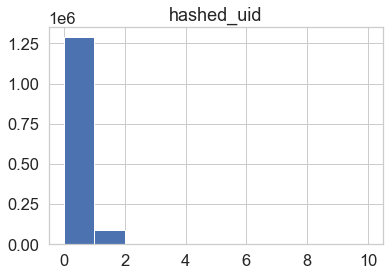

In [20]:
a[(a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_uid')

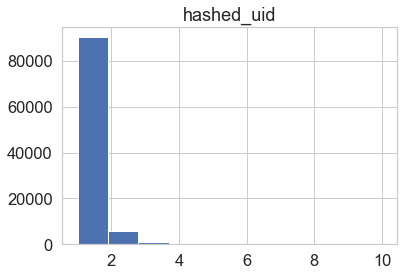

In [21]:
a[(a.is_display_clicked > 0) & (a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_xd_id')

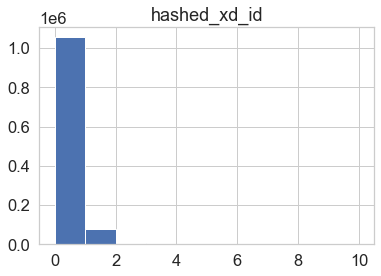

In [22]:
b[(b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

Text(0.5, 1.0, 'hashed_xd_id')

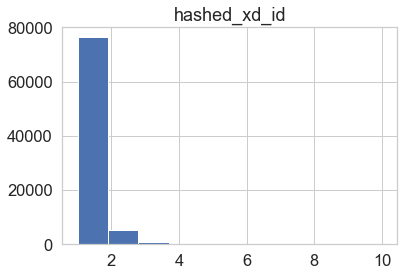

In [23]:
b[(b.is_display_clicked > 0) & (b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

## Valeurs nan dans les clics

Proportion des valeurs nan pour chaque variable parmi les publicités cliquées

In [24]:
c = df.loc[df['is_display_clicked']==1]
c.isnull().sum(axis = 0)/len(c)

Unnamed: 0                                        0.000000
day                                               0.000000
hashed_partner_id                                 0.000000
hashed_campaign_id                                0.000000
contextid                                         0.000000
display_env                                       0.000000
target_env                                        0.000000
rtbtypeid                                         0.003587
rtbadvisibility                                   0.003587
rtb_detectedlanguage                              0.003587
urlhash2                                          0.083522
urlhash3                                          0.083522
urlhash4                                          0.083522
user_country                                      0.000217
hashed_affiliateid                                0.000000
hashed_app_id                                     0.358497
googleviewability                                 0.6205